In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from bokeh.io import output_notebook, push_notebook

In [253]:
df = pd.read_csv("Inpatient_Prospective_Payment_System.csv")
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [254]:
df.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71


In [255]:
df[' Average Covered Charges '] = pd.to_numeric(df[' Average Covered Charges '].apply(lambda x: x.strip('$')))
df[' Average Total Payments '] = pd.to_numeric(df[' Average Total Payments '].apply(lambda x: x.strip('$')))
df['Average Medicare Payments'] = pd.to_numeric(df['Average Medicare Payments'].apply(lambda x: x.strip('$')))
df.to_csv("hospital_charges_numeric.csv")
df.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71


In [256]:
top_5 = df.loc[(df['DRG Definition'] == "194 - SIMPLE PNEUMONIA & PLEURISY W CC") |
               (df['DRG Definition'] == "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC") |
               (df['DRG Definition'] == "292 - HEART FAILURE & SHOCK W CC") |
               (df['DRG Definition'] == "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC") |
               (df['DRG Definition'] == "641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC"), :]

# only_billy_and_peter = df.loc[(df["first_name"] == "Billy") | (df["first_name"] == "Peter"), :]
print(len(top_5))
top_5['DRG Definition'].unique()

14814


array(['194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '292 - HEART FAILURE & SHOCK W CC',
       '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',
       '641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC',
       '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC'], dtype=object)

In [270]:
top_1 = top_5.loc[(top_5['DRG Definition'] == "194 - SIMPLE PNEUMONIA & PLEURISY W CC")]
# top_1 = top_1.sort_values('Provider State')
# top_1.reset_index(inplace=True)
# del top_1['index']
# top_1.reset_index(inplace=True)

mins = top_1[' Average Covered Charges '].min()
maxs = top_1[' Average Covered Charges '].max()
print(mins,maxs)

5092.6 124050.68


(array([   0.,    0.,    7.,   30.,  128.,  184.,  268.,  289.,  296.,
         249.,  181.,  209.,  197.,  140.,  127.,  100.,   73.,   59.,
          56.,   58.,   35.,   40.,   41.,   38.,   33.,   18.,   18.,
          23.,   25.,   11.,   13.,   11.,   11.,    7.,    3.,    5.,
           3.,    5.,    4.,    5.,    3.,    0.,    1.,    3.,    3.,
           3.,    2.,    1.,    0.,    0.,    1.,    0.,    2.,    0.,
           1.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([     0,   2000,   4000,   6000,   8000,  10000,  12000,  14000,
         16000,  18000,  20000,  22000,  24000,  26000,  28000,  30000,
         32000,  34000,  36000,  38000,  40000,  42000,  44000,  46000,
         48000,  50000,  52000,  54000,  56000,  58000,  60000,  62000,
         64000,  66000,  68000,  70000,  72000,  74000,  76000,  78000,
         80000,  82000,  84000,  86000,  88000,  90000,  92000,  94000,
         96000,  98000, 100000, 102000, 104000, 106000, 108000, 110000,
    

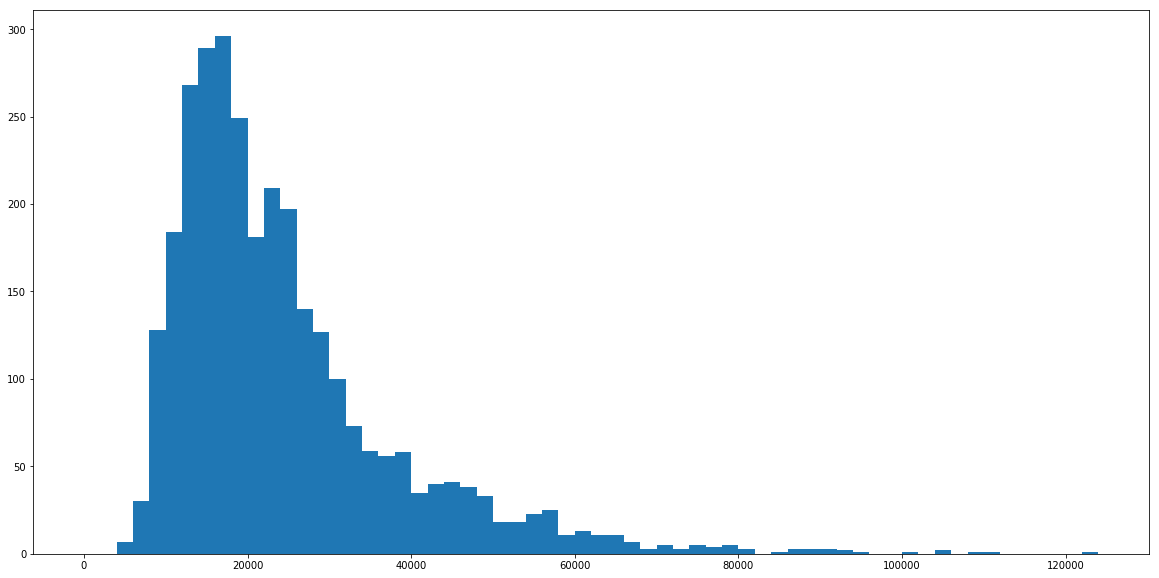

In [277]:
x_axis2 = np.arange(len(top_1[' Average Covered Charges ']))
bins = np.arange(0,125000, 2000)
plt.figure(figsize=(20,10))
plt.hist(top_1[' Average Covered Charges '], bins=bins)


In [279]:
grouped_5 = top_5.groupby("DRG Definition")
mean_5 = grouped_5.mean()
sem_5 = grouped_5.sem()
mean_5.head()

,index,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
DRG Definition,,,,,,,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,33057.017532,259537.788621,50358.601389,65.626861,24549.381211,6963.253596,5890.898812
292 - HEART FAILURE & SHOCK W CC,64481.157467,258867.616661,50001.124958,75.190654,23517.980789,6957.831656,6132.341256
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",103203.187458,258448.829492,49973.425424,83.001356,19086.716512,5041.766136,3962.437668
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",132610.035185,259015.955847,49832.188341,53.004484,16703.611059,4781.625178,3855.451093
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,143152.656407,259098.446972,50231.157912,69.151890,18280.231134,5353.763309,4437.804065


In [259]:
sem_5.head()

,Average Covered Charges,Average Total Payments,Total Discharges,Average Medicare Payments,Hospital Referral Region Description,Provider City,Provider Id,Provider Name,Provider State,Provider Street Address,Provider Zip Code
DRG Definition,,,,,,,,,,,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,259.649362,29.978702,0.871856,29.579597,NaN,NaN,2828.377322,NaN,NaN,NaN,503.304218
292 - HEART FAILURE & SHOCK W CC,251.170742,30.373737,1.215734,30.098924,NaN,NaN,2861.170487,NaN,NaN,NaN,511.462385
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",191.751762,21.648651,1.409529,21.554777,NaN,NaN,2859.000839,NaN,NaN,NaN,509.897061
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",176.779380,21.688191,0.754585,20.999926,NaN,NaN,2870.907697,NaN,NaN,NaN,511.503230
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,191.185724,23.507670,1.068838,23.416986,NaN,NaN,2857.759501,NaN,NaN,NaN,505.726215


In [260]:
#total hospitals 3201
hospitals = df.groupby('Provider Id').count()
hospitals_sorted = hospitals.sort_values('Provider Name', ascending = False)
hospitals_sorted

,DRG Definition,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider Id,,,,,,,,,,,
230130,100,100,100,100,100,100,100,100,100,100,100
10092,100,100,100,100,100,100,100,100,100,100,100
80001,100,100,100,100,100,100,100,100,100,100,100
180040,100,100,100,100,100,100,100,100,100,100,100
330106,100,100,100,100,100,100,100,100,100,100,100
340032,100,100,100,100,100,100,100,100,100,100,100
490005,100,100,100,100,100,100,100,100,100,100,100
40114,100,100,100,100,100,100,100,100,100,100,100
440049,100,100,100,100,100,100,100,100,100,100,100


In [261]:
x_axis = np.arange(len(hospitals['Provider Name']))
bins = []
x_axis

array([   0,    1,    2, ..., 3334, 3335, 3336])

(array([ 1000.,   719.,   683.,   935.]),
 array([  0,  25,  50,  75, 100]),
 <a list of 4 Patch objects>)

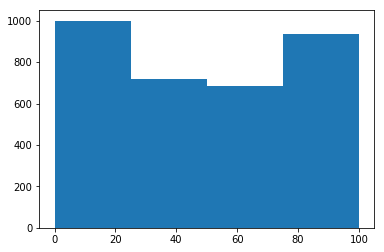

In [262]:
plt.hist(hospitals_sorted['Provider Name'], bins=[0, 25, 50, 75, 100])


In [263]:
top_5.reset_index(inplace=True)
top_5.head()

,index,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,25714,194 - SIMPLE PNEUMONIA & PLEURISY W CC,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,60386.84,9175.01,8250.46
1,25800,194 - SIMPLE PNEUMONIA & PLEURISY W CC,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,6040,CT - Hartford,69,16737.85,6583.78,5606.82
2,25829,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,33432.12,7389.15,6414.65
3,29503,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100062,MUNROE REGIONAL MEDICAL CENTER,1500 SW 1ST AVE,OCALA,FL,34474,FL - Ocala,96,25886.77,5419.63,4542.18
4,29740,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100181,LARKIN COMMUNITY HOSPITAL,7031 SW 62ND AVE,SOUTH MIAMI,FL,33143,FL - Miami,74,39932.79,8326.00,7615.60


In [264]:
top_5.head()

,index,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,25714,194 - SIMPLE PNEUMONIA & PLEURISY W CC,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,60386.84,9175.01,8250.46
1,25800,194 - SIMPLE PNEUMONIA & PLEURISY W CC,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,6040,CT - Hartford,69,16737.85,6583.78,5606.82
2,25829,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,33432.12,7389.15,6414.65
3,29503,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100062,MUNROE REGIONAL MEDICAL CENTER,1500 SW 1ST AVE,OCALA,FL,34474,FL - Ocala,96,25886.77,5419.63,4542.18
4,29740,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100181,LARKIN COMMUNITY HOSPITAL,7031 SW 62ND AVE,SOUTH MIAMI,FL,33143,FL - Miami,74,39932.79,8326.00,7615.60


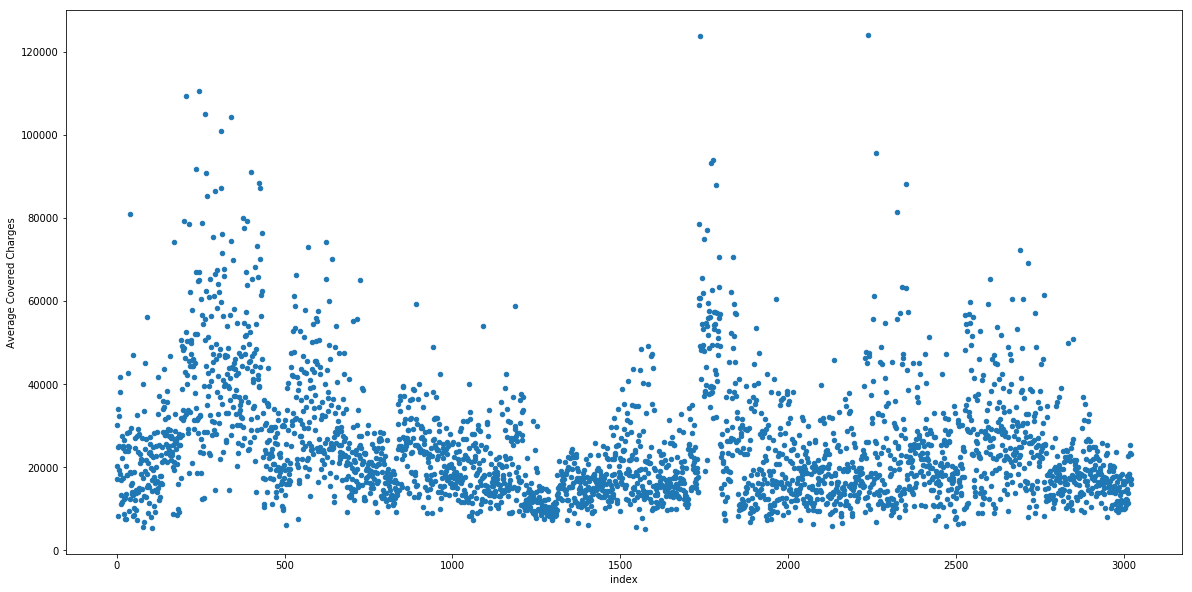

In [265]:
x2 = np.arange(len(top_5[' Average Covered Charges ']))
top_1.plot.scatter('index', ' Average Covered Charges ', figsize=(20,10))

In [266]:
xx = pd.DataFrame(random.random(50, 4), columns=['a', 'b', 'c', 'd'])
xx.head()

TypeError: random() takes no arguments (2 given)